In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import xarray as xr
import numpy as np

import glob
import os

%matplotlib inline

In [17]:
plt.style.use('seaborn-talk')

# 2020

In [18]:
year=2020

In [19]:
lat_min=35
lon_min=-75
lat_max=55
lon_max=-30

In [20]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [21]:
stokes = glob.glob(f'data/{year}/stokes_*')
stokes.extend(glob.glob(f'data/{year}/Stokes*'))
SVPs = glob.glob(f'data/{year}/SVP*')
oskers = glob.glob(f'data/{year}/OSKERS*')
codes= glob.glob(f'data/{year}/davis*')
codes.extend(glob.glob(f'data/{year}/Davis*'))

In [22]:
def pretty_map(ax):
    # Add coastlines
    ax.coastlines(linewidth=1)
    # Add gridlines 
    gl = ax.gridlines(linestyle='--',draw_labels={"bottom": "x", "left": "y"},zorder=10)
    ax.add_feature(cfeature.LAND)

In [23]:
def plot_bathymetry(ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    bathy = etopo.z.values
    levels = [-1000,]
    CS = ax.contour(lons,lats,bathy,levels, transform=ccrs.PlateCarree(),
                    linestyles='solid', linewidth=0.05,colors='lightgrey')

In [24]:
def plot_spotter(fname, ax):
    d = pd.read_csv(fname)
    x, y = d['Longitude (deg)'].values, d['Latitude (deg)'].values
    ax.plot(x,y,color='C0', label='Spotter', transform=ccrs.PlateCarree()) 

In [25]:
def plot_SVPs(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        x, y = d[' LONGITUDE'].values,d[' LATITUDE'].values
        if count==0:
            ax.plot(x,y,color='C1', label='SVPs', transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C1', label='_nolabel__', transform=ccrs.PlateCarree()) 
        count+=1

In [26]:
def plot_davis(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        x, y = d[' LONGITUDE'].values,d[' LATITUDE'].values
        if count==0:
            ax.plot(x,y,color='C4', label='Code-davis', transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C4', label='_nolabel__', transform=ccrs.PlateCarree())
        count+=1

In [27]:
def plot_stokes(files, ax):
    count=0
    for f in files:
        print(f)
        d = pd.read_csv(f)
        d = d[d[' Latitude'].between(-90,90)]  
        x, y = d[' Longitude'].values,d[' Latitude'].values
        if count==0:
            ax.plot(x,y,color='C3', label='stokes',transform=ccrs.PlateCarree())
        else:
            ax.plot(x,y,color='C3', label='_nolabel__',transform=ccrs.PlateCarree())
        count+=1

In [28]:
def plot_oskers(files, ax):
    count=0
    for file in files:
        print(file)
        d = pd.read_csv(file)
        dg = d.groupby('Device')
        for name, g in dg:
            x, y = g['Longitude'].values,g['Latitude'].values
            if count ==0:
                ax.plot(x,y,color='C2', label='Osker', transform=ccrs.PlateCarree())
            else:
                ax.plot(x,y,color='C2', label='__nolabel__',transform=ccrs.PlateCarree())
            count+=1

/home/soontiensn/miniconda-new/envs/develop/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1666: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


data/2020/SVP DFO-TREX-2020-09 02-300234066927960-20221013T140637UTC.csv
data/2020/SVP DFO-TREX-2020-09 03-300234066927950-20221013T140703UTC.csv
data/2020/SVP DFO-TREX-2020-09 01-300234067058890-20221013T140636UTC.csv
data/2020/Davis DFO-TREX-2020-09 11-300234066039410-20221013T140623UTC.csv
data/2020/Davis DFO-TREX-2020-09 05-300234066035400-20221013T140607UTC.csv
data/2020/Davis DFO-TREX-2020-09 07-300234066036420-20221013T140614UTC.csv
data/2020/Davis DFO-TREX-2020-09 12-300234066031400-20221013T140625UTC.csv
data/2020/Davis DFO-TREX-2020-09 09-300234066927970-20221013T140619UTC.csv
data/2020/Davis DFO-TREX-2020-09 03-300234066921990-20221013T140603UTC.csv
data/2020/Davis DFO-TREX-2020-09 08-300234066032420-20221013T140618UTC.csv
data/2020/Davis DFO-TREX-2020-09 01-300234066033410-20221013T140558UTC.csv
data/2020/Davis DFO-TREX-2020-09 02-300234066926960-20221013T140602UTC.csv
data/2020/Davis DFO-TREX-2020-09 04-300234066924980-20221013T140605UTC.csv
data/2020/Davis DFO-TREX-2020-0

Text(0.5, 1.0, '2020 drifters')

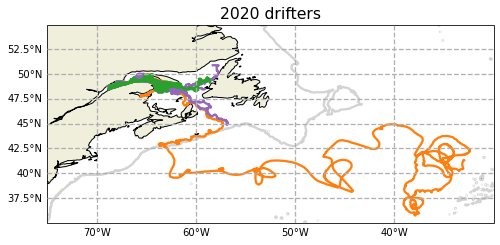

In [29]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

plot_bathymetry(ax,esel)
plot_SVPs(SVPs, ax)
plot_davis(codes, ax)
plot_oskers(oskers, ax)

plot_stokes(stokes, ax)
pretty_map(ax)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title(f'{year} drifters')

In [30]:
fig.savefig('2020EastCoastdeployments.png', bbox_inches='tight')